<H1>Synapses</H1>
<P>Simulation of a chemical synapse between principal cells</P> 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from neuron import h
h.load_file('stdrun.hoc') # using neuron library used by the iv graphics

1.0

<H3>Model specification </H3>

<P> 1. Topology and biophysical properties of a single-compartment</P>

In [3]:
class Cell:
    def __init__(self, myname):
        """
        Create a single compartiment with Hodgkin-Huxley 
        conductances.
        """
        self.soma = h.Section(name = myname)
        self.soma.diam = 3.57 # PI*R^2 area 10 um^2
        
        self.soma.insert('pas') # RC basic circuit
        self.soma.e_pas = -65 # resting membrane potential

        self.soma.insert('hh') # HH conductances
        

In [4]:
#create two cells
neuron_pre = Cell(myname = 'pre')
neuron_post = Cell(myname = 'post')

<H3>Instrumentation</H3>

<P> 2. Stimulate the presynaptic cell</P>

In [5]:
stim = h.IClamp(0.5,neuron_pre.soma) 
stim.amp = 1 # in nA
stim.delay = 5 # in ms
stim.dur = 0.5 # in ms

<P> 3. Create postsynaptic side of the synapse </P>

In [6]:
postsyn = h.ExpSyn(neuron_post.soma(0.5))
postsyn.tau = .1 # decay time constant
postsyn.e = 0 # reversal potential, by default is set to 0


<P> 4. Create the presynaptic side (transmission delay, and synaptic weight) <P>

In [7]:
syn= h.NetCon(neuron_pre.soma(0.5)._ref_v, postsyn, sec = neuron_pre.soma)
syn.weight[0] = 5

In [8]:
syn.delay = 2.5 # in ms (default 1)

<H2>Simulation control</H3>

<p> 5. Record, run and plot

In [9]:
t,v1,v2 = h.Vector(), h.Vector(), h.Vector()
t.record(h._ref_t)
v1.record(neuron_pre.soma(0.5)._ref_v)
v2.record(neuron_post.soma(0.5)._ref_v)
h.finitialize(-65)
h.continuerun(20)

0.0

C:\Users\cespinoza\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


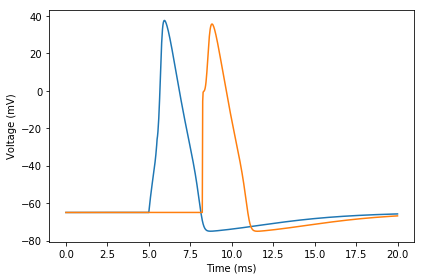

In [10]:
plt.plot(t,v1,t,v2)
plt.xlabel('Time (ms)'), plt.ylabel('Voltage (mV)')
plt.show()

In [11]:
# delete Hogdkin-Huxley conductances in the post-synaptic neuron
neuron_post.soma.gnabar_hh = 0.0
neuron_post.soma.gkbar_hh = 0.0

In [12]:
def myrun(tstop):
    """
    Prepare runs the simulation until tstop
    and plot voltages from neuron_pre and
    neuron_post
    """
    # create hoc vectors
    t,v1,v2 = h.Vector(), h.Vector(), h.Vector()
    
    t.record(h._ref_t) # simulation time
    
    v1.record( neuron_pre.soma(0.5)._ref_v ) # voltage neuron_pre
    v2.record( neuron_post.soma(0.5)._ref_v ) # voltage neuron_post
    h.finitialize(-65)
    h.continuerun(tstop)
    
    # plot voltage vs time for both neurons
    plt.plot(t, v1,label='pre', color = 'darkblue')
    plt.plot(t, v2, label='post', color = 'orange')
    plt.legend()
    plt.xlabel('Time (ms)'), plt.ylabel('Voltage (mV)')
    plt.show()
    

C:\Users\cespinoza\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


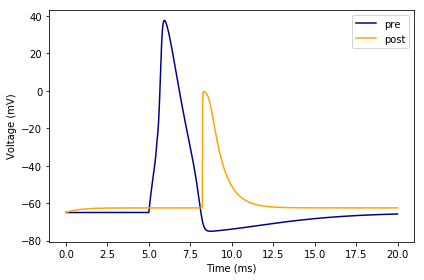

In [13]:
myrun(tstop = 20)